### Momentum Nasdaq 100
Trade Frequency: Monthly
Select the 50 best stocks of the nasdaq 100 by percentage change of the last 12 months

Among these: Selcet the best 30 shares by percentage chage in the last 6 months

Among the latter: Select the top 10  shares by percentage change in the last 3 months

Repeat the analysis on a fixed day monthly (Eg: the third Friday)

In [2]:
import pandas as pd 
import yfinance as yf 
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
ticker_df = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

In [6]:
tickers = ticker_df.Symbol.to_list()

In [7]:
df = yf.download(tickers, start='2010-01-01')['Adj Close']

[*********************100%***********************]  102 of 102 completed


In [9]:
df.size

332316

In [10]:
#exclude companies that were not traded prior to selected df data
df = df.dropna(axis=1)
df

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SIRI,SNPS,SWKS,TMUS,TXN,VRSK,VRSN,VRTX,WBA,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.515212,37.090000,23.067621,27.491217,25.670000,21.142134,18.500000,11.328529,9.700000,43.267170,...,0.579823,22.440001,13.017758,13.207044,18.767336,29.123720,21.007998,44.240002,26.326164,13.597207
2010-01-05,6.526477,37.700001,23.031210,27.343588,25.280001,20.900097,18.010000,11.241386,9.710000,42.892376,...,0.615505,22.250000,13.219785,13.240186,18.659115,29.318859,21.228777,42.779999,26.114429,13.435948
2010-01-06,6.422665,37.619999,22.987497,27.279394,25.340000,21.111879,17.480000,11.217623,9.570000,42.570061,...,0.615505,22.209999,13.096807,12.345354,18.522007,29.699368,20.999506,42.029999,25.916805,13.461752
2010-01-07,6.410791,36.889999,22.805405,27.266571,25.480000,21.293415,17.430000,11.098792,9.470000,42.180252,...,0.597664,22.150000,12.947481,12.461351,18.579737,29.650585,20.710794,41.500000,26.072071,13.403695
2010-01-08,6.453412,36.689999,22.936512,27.228052,26.260000,21.547554,17.660000,11.526583,9.430000,42.555054,...,0.597664,22.309999,13.175868,11.765371,19.005444,29.270075,20.872133,40.669998,26.107365,13.410150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,146.630005,334.089996,167.839996,263.115082,198.389999,94.519997,187.910004,106.430000,73.620003,284.910004,...,6.180000,331.269989,93.739998,150.619995,177.389999,183.149994,197.289993,317.600006,41.209999,68.680000
2022-12-06,142.910004,331.149994,166.509995,257.283325,194.610001,96.370003,186.039993,104.709999,70.269997,283.290009,...,6.150000,328.019989,92.239998,149.389999,174.339996,182.039993,197.449997,311.809998,40.590000,69.320000
2022-12-07,140.940002,326.679993,166.009995,257.970001,193.339996,96.669998,187.330002,106.110001,70.139999,285.760010,...,6.200000,323.799988,91.959999,148.789993,173.750000,182.960007,195.990005,317.579987,40.650002,68.870003


In [11]:
#resample to obtain monthly return 
mtl = (df.pct_change()+1)[1:].resample('M').prod()
mtl.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SIRI,SNPS,SWKS,TMUS,TXN,VRSK,VRSN,VRTX,WBA,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.897435,0.870855,0.851279,0.952370,0.926763,0.991700,1.013514,0.851749,0.769072,1.013167,...,1.292308,0.947861,0.856275,0.706399,0.869486,0.942044,0.926031,0.867993,0.966488,0.985768
2010-02-28,1.065396,1.072755,1.084569,1.020103,1.171921,0.982246,0.965333,1.009773,1.060322,0.968024,...,1.214286,1.029619,1.203310,1.095915,1.083556,1.006401,1.087735,1.055729,0.981576,1.001444
2010-03-31,1.148470,1.020779,0.992337,1.077119,1.053802,1.016657,1.068508,1.100490,1.171934,1.057057,...,0.852941,1.021461,1.021611,1.147488,1.003691,0.996466,1.044141,1.008140,1.052497,1.030483
2010-04-30,1.111021,0.949958,1.038515,0.975265,1.156910,1.003511,0.879007,1.023014,0.978425,0.957721,...,1.356322,1.012964,1.078846,1.077684,1.067762,0.993617,1.048424,0.948618,0.947695,1.025943
2010-05-31,0.983875,0.954762,0.982144,0.942587,0.860841,0.943656,0.877647,0.942779,0.944873,0.903507,...,0.872882,0.945278,0.946524,1.178244,0.938870,1.079586,1.023094,0.892185,0.915058,0.942069


In [12]:
#function that calculates 12, 6 and 3 monthly return 
def get_rolling_ret(df,n):
    return df.rolling(n).apply(np.prod)

In [13]:
ret_12, ret_6, ret_3 = get_rolling_ret(mtl,12), get_rolling_ret(mtl,6), get_rolling_ret(mtl,3)

In [14]:
#cascade
top_50 = ret_12.loc['2010-12-31'].nlargest(50).index
top_50

Index(['NFLX', 'SIRI', 'BIDU', 'LULU', 'ILMN', 'SWKS', 'FTNT', 'BKNG', 'DLTR',
       'ODFL', 'INTU', 'DXCM', 'PCAR', 'TMUS', 'ORLY', 'CTSH', 'MAR', 'AVGO',
       'AAPL', 'ROST', 'ADSK', 'FAST', 'VRSN', 'SGEN', 'SBUX', 'MTCH', 'HON',
       'CDNS', 'CSX', 'AMZN', 'REGN', 'MNST', 'MELI', 'CMCSA', 'LRCX', 'IDXX',
       'TXN', 'BIIB', 'MCHP', 'KDP', 'COST', 'ADI', 'SNPS', 'MDLZ', 'FISV',
       'XEL', 'ANSS', 'EBAY', 'VRSK', 'ADP'],
      dtype='object')

In [17]:
top_30 = ret_6.loc['2010-12-31', top_50].nlargest(30).index
top_30

Index(['BKNG', 'FTNT', 'LULU', 'SIRI', 'SWKS', 'AMZN', 'NFLX', 'ADSK', 'TMUS',
       'REGN', 'CTSH', 'ILMN', 'PCAR', 'CDNS', 'EBAY', 'BIDU', 'INTU', 'BIIB',
       'TXN', 'MAR', 'HON', 'ADI', 'ODFL', 'LRCX', 'AVGO', 'DLTR', 'VRSN',
       'MNST', 'SBUX', 'COST'],
      dtype='object')

In [18]:
top_10 = ret_3.loc['2010-12-31', top_30].nlargest(10).index
top_10

Index(['LULU', 'SWKS', 'SIRI', 'FTNT', 'ILMN', 'AVGO', 'SBUX', 'ODFL', 'LRCX',
       'HON'],
      dtype='object')

In [19]:
#synthesize cascade into function 
def get_top(date):
    top_50 = ret_12.loc[date].nlargest(50).index
    top_30 = ret_6.loc[date, top_50].nlargest(30).index
    top_10 = ret_3.loc[date, top_30].nlargest(10).index
    return top_10

In [20]:
get_top('2010-12-31')

Index(['LULU', 'SWKS', 'SIRI', 'FTNT', 'ILMN', 'AVGO', 'SBUX', 'ODFL', 'LRCX',
       'HON'],
      dtype='object')

In [33]:
#screen the monthly data frame of each top choice stock
portfolio = mtl.loc['2010-12-31':,get_top('2010-12-31')][1:2]
portfolio

,LULU,SWKS,SIRI,FTNT,ILMN,AVGO,SBUX,ODFL,LRCX,HON
Date,,,,,,,,,,
2011-01-31,1.0038,1.109675,0.993865,1.188563,1.094727,1.01056,0.981326,1.005627,0.963499,1.053612


In [34]:
#gain / loss
portfolio.mean(axis=1)

Date
2011-01-31    1.040525
Freq: M, dtype: float64

In [96]:
#synthesize into function
def pf_performance(date):
    portfolio = mtl.loc[date:,get_top(date)][1:2]
    return (date,portfolio.mean(axis=1).values[0])

In [97]:
pf_performance('2010-12-31')

('2010-12-31', 1.040525341118584)

In [37]:
mtl.index[:-1]

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=155, freq='M')

In [98]:
returns = []

for date in mtl.index[:-1]:
    returns.append(pf_performance(date))

In [104]:
price = {'price':[n[1] for n in returns]}
momentum = pd.DataFrame(data=price, index=[n[0] for n in returns])

In [105]:
momentum

,price
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
...,...
2022-07-31,0.925597
2022-08-31,0.937031
2022-09-30,1.077379
2022-10-31,1.068505


In [107]:
momentum.price.cumprod()#.plot()

2010-01-31          NaN
2010-02-28          NaN
2010-03-31          NaN
2010-04-30          NaN
2010-05-31          NaN
                ...    
2022-07-31    20.129408
2022-08-31    18.861877
2022-09-30    20.321399
2022-10-31    21.713520
2022-11-30    21.031051
Name: price, Length: 155, dtype: float64

<AxesSubplot:>

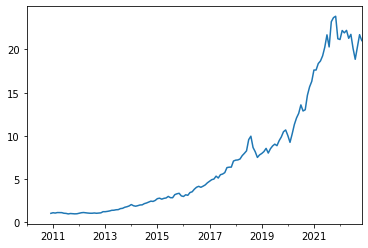

In [108]:
momentum.price.cumprod().plot()

In [111]:
#performance comparisson 
nas_df = yf.download('^IXIC', start='2010-01-01')
#nas_df.head(10)

[*********************100%***********************]  1 of 1 completed


In [112]:
nas_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
2010-01-11,2324.780029,2326.280029,2302.209961,2312.409912,2312.409912,2077890000
2010-01-12,2297.280029,2298.850098,2272.699951,2282.310059,2282.310059,2368320000
2010-01-13,2289.459961,2313.030029,2274.120117,2307.899902,2307.899902,2318350000
2010-01-14,2303.310059,2322.560059,2303.290039,2316.739990,2316.739990,2254170000


In [114]:
(nas_df['Adj Close'].pct_change() + 1).cumprod()

Date
2010-01-04         NaN
2010-01-05    1.000126
2010-01-06    0.996825
2010-01-07    0.996374
2010-01-08    1.003790
                ...   
2022-12-05    4.869106
2022-12-06    4.771614
2022-12-07    4.747208
2022-12-08    4.800686
2022-12-09    4.767166
Name: Adj Close, Length: 3258, dtype: float64

<AxesSubplot:xlabel='Date'>

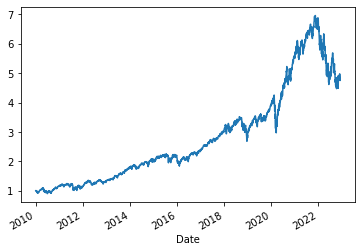

In [115]:
(nas_df['Adj Close'].pct_change() + 1).cumprod().plot()

In [119]:
pd.Series([i- 0.01 for i in momentum.price], index=momentum.index).cumprod()

2010-01-31         NaN
2010-02-28         NaN
2010-03-31         NaN
2010-04-30         NaN
2010-05-31         NaN
                ...   
2022-07-31    5.070153
2022-08-31    4.700188
2022-09-30    5.016884
2022-10-31    5.310398
2022-11-30    5.090385
Length: 155, dtype: float64